In [64]:
%matplotlib inline

import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
# import scipy.optimize as st
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.style.use('ggplot')

### Getting the elnino dataset to fit a distribution to it

In [4]:
data = pd.Series(sm.datasets.elnino.load_pandas().data.set_index('YEAR').values.ravel())

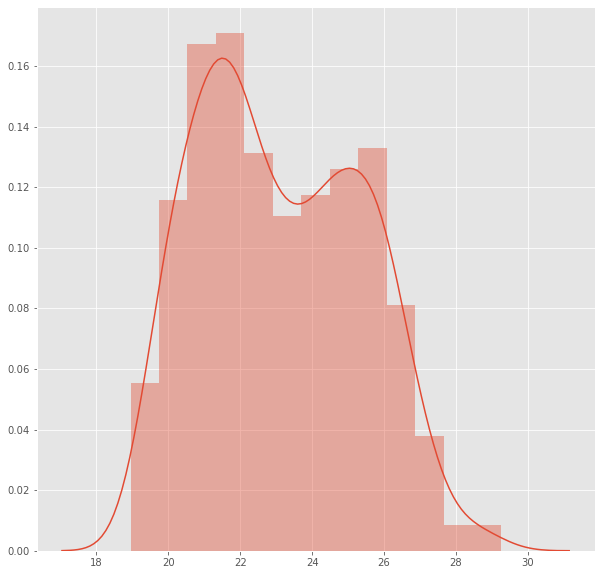

In [11]:
sns.distplot(data)

In [24]:
parameters = st.norm.fit(data)

print("mean, std.dev: ", parameters)

mean, std.dev:  (23.09262295081967, 2.2443681683984593)


### Look up the KS table

In [28]:
ks_table = st.kstest(data, "norm", parameters)

### looking at the KS table

In [29]:
p_value = ks_table[1]/np.sqrt(len(data))

print(p_value)

5.291208517201392e-06


### Look up the KS table after fitting the data
Lower the p value better the fit

In [76]:

DISTRIBUTIONS = [        
    st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
    st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
    st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
    st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
    st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
    st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
    st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
    st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
    st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
    st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
]

# putting data in 200 bins
y, x = np.histogram(data, bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

In [77]:
# best dist

best_distribution = st.norm
best_params = (0.0, 1.0)
best_sse = np.inf

In [78]:
for distribution in DISTRIBUTIONS:
    # Trying to fit the distribution
    try:
        # Ignore warnings from data that can't be fit
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')

            # fit dist to data
            params = distribution.fit(data)

            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]

            # Calculate fitted PDF and error with fit in distribution
            pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))

            # if axis pass in add to plot
            try:
                if ax:
                    pd.Series(pdf, x).plot(ax=ax)
                end
            except Exception:
                pass

            # identify if this distribution is better
            if best_sse > sse > 0:
                best_distribution = distribution
                best_params = params
                best_sse = sse

    except Exception:
        pass

In [84]:
best_distribution.name

'johnsonsb'

norm.ppf(0.95, loc=0, scale=1)

Returns a 95% significance interval for a one-tail test on a standard normal distribution \
(i.e. a special case of the normal distribution where the mean is 0 and the standard deviation is 1).

In [92]:
best_params

(0.48180802182650617,
 0.9835826571292925,
 18.689276660398363,
 10.958573456318526)

In [93]:
best_sse

0.5357835973697368

In [94]:
start = st.johnsonsb.ppf(0.01, loc=loc, scale=scale, *best_params[:-2])
end = st.johnsonsb.ppf(0.99, loc=loc, scale=scale, *best_params[:-2])

In [97]:
number_of_samples = 10000

In [100]:
x = np.linspace(start, end, 10000)
y = best_distribution.pdf(x, loc=loc, scale=scale, *best_params[:-2])
pdf = pd.Series(y, x)

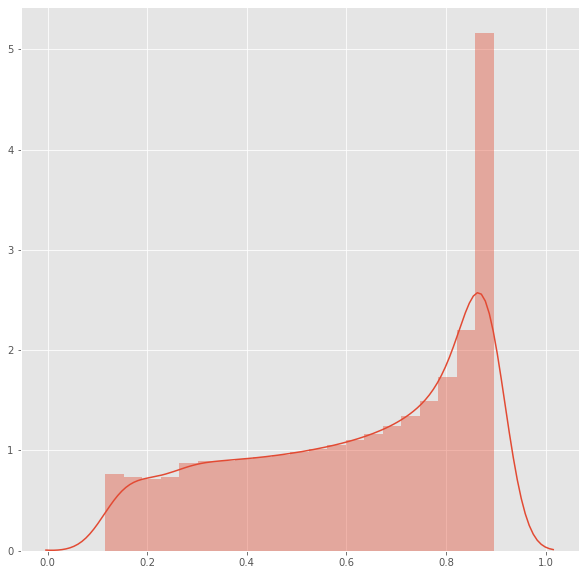

In [107]:
sns.distplot(pdf)